# Aprendiendow.~

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

plt.style.use("seaborn-whitegrid")

In [66]:
df = pd.read_csv("earnings.csv").drop(columns = "Unnamed: 0")
df.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0


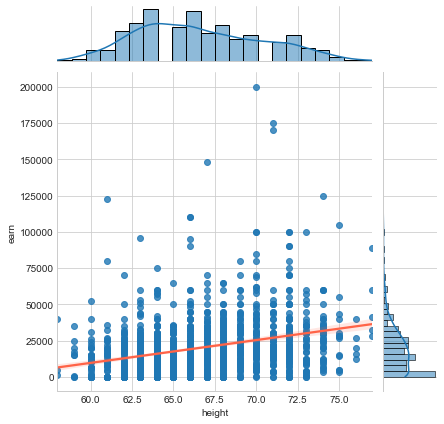

In [13]:
sns.jointplot(data = df, x = 'height', y = 'earn', kind = 'reg', line_kws = {'color':'tomato'})

In [22]:
categorical_columns = ['sex', 'race', 'hisp', 'age_category', 'eth', 'male']

for cat in categorical_columns:
    print(cat)
    print(df[cat].value_counts())
    print(df[cat].value_counts('%'))
    print("*******************************")

sex
2    856
1    518
Name: sex, dtype: int64
2    0.622999
1    0.377001
Name: sex, dtype: float64
*******************************
race
1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64
*******************************
hisp
2    1294
1      80
Name: hisp, dtype: int64
2    0.941776
1    0.058224
Name: hisp, dtype: float64
*******************************
age_category
1    564
2    436
3    374
Name: age_category, dtype: int64
1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64
*******************************
eth
3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64
*******************************
male
0    856
1    518
Name: male, dtype: int64
0    0.622999
1    0.377001
Name: male, dtype: float64
*******************************


In [41]:
model1 = smf.ols('earn ~ height', data = df).fit()
model1.params

Intercept   -84868.101530
height        1574.410254
dtype: float64

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.65e-30
Time:                        22:44:51   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
modelo2 = smf.ols('earn ~ male', data = df).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.95e-41
Time:                        23:03:58   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='age', ylabel='earn'>

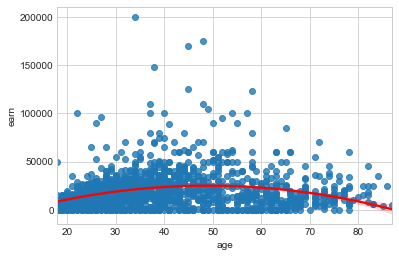

In [48]:
sns.regplot(x = 'age', y = 'earn', data = df, # donde definimos que estimaremos una recta con dos gradospolinomiales
            order = 2, line_kws = {'color' : 'red'})

In [74]:
df['age_sq'] = df['age'] **2
model3= smf.ols('earn ~ age + age_sq', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.80e-18
Time:                        23:22:02   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#df['age_sq'] = df['age'] **2
model4= smf.ols('earn ~ age', data=df).fit()
model4.summary()

#Este modelo es peor que si no le agregamos su forma cuadrática

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.463
Date:                Mon, 23 Aug 2021   Prob (F-statistic):             0.0111
Time:                        23:14:29   Log-Likelihood:                -15538.
No. Observations:                1374   AIC:                         3.108e+04
Df Residuals:                    1372   BIC:                         3.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.64e+04   1507.891     10.873      0.000    1.34e+04    1.94e+04
age           87.1521     34.281      2.542      0.011      19.904     154.400
==============================================================================
Omnibus:                      852.628   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12403.301
Skew:                           2.641   Prob(JB):                         0.00
Kurtosis:                      16.739   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
df['ed_sq'] = df['ed'] **2
model5= smf.ols('earn ~ ed + ed_sq + male + age + age_sq + height', data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     95.69
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.68e-100
Time:                        23:22:07   Log-Likelihood:                -15301.
No. Observations:                1374   AIC:                         3.062e+04
Df Residuals:                    1367   BIC:                         3.065e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.415e+04   1.42e+04     -3.803      0.000   -8.21e+04   -2.62e+04
ed         -1058.2513   1281.062     -0.826      0.409   -3571.312    1454.809
ed_sq        135.8627     48.069      2.826      0.005      41.566     230.159
male        1.227e+04   1312.585      9.345      0.000    9691.117    1.48e+04
age         1519.3004    161.902      9.384      0.000    1201.697    1836.903
age_sq       -14.5931      1.717     -8.498      0.000     -17.962     -11.224
height       365.1473    168.541      2.167      0.030      34.520     695.774
==============================================================================
Omnibus:                      848.069   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14254.456
Skew:                           2.564   Prob(JB):                         0.00
Kurtosis:                      17.923   Cond. No.                     7.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

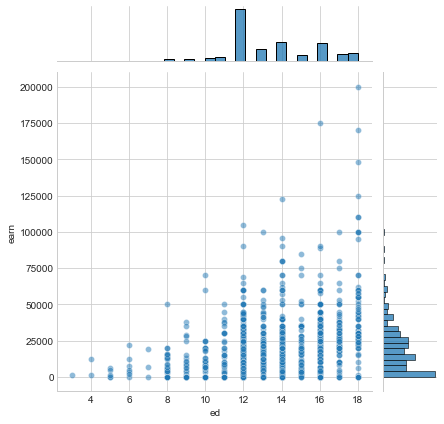

In [61]:
sns.jointplot(x = 'ed' , y = 'earn', data = df, alpha = 0.5)

<AxesSubplot:>

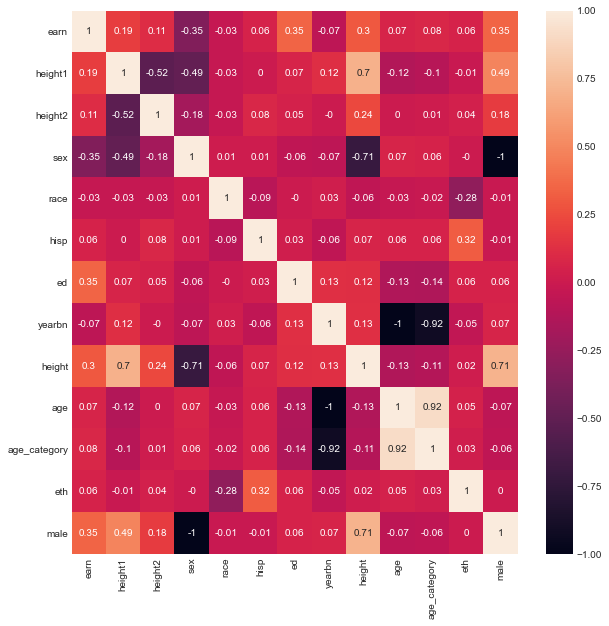

In [69]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df.corr().round(2), annot = True)

In [73]:
df.columns

Index(['earn', 'height1', 'height2', 'sex', 'race', 'hisp', 'ed', 'yearbn',
       'height', 'age', 'age_category', 'eth', 'male', 'ed_sq'],
      dtype='object')